In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.mnist.load_data()

In [3]:
train_images = trainX/255
test_images = testX/255

In [4]:
dataset_images = tf.data.Dataset.from_tensor_slices(train_images)

In [5]:
dataset_labels = tf.data.Dataset.from_tensor_slices(trainy)

In [6]:
dataset = tf.data.Dataset.zip((dataset_images, dataset_labels))

In [7]:
batch_size = 256
dataset = dataset.shuffle(train_images.shape[0]).repeat().batch(batch_size)

## L1, L2 test

In [8]:
model_dense_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model_dense_0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [10]:
history_dense_0 = model_dense_0.fit(dataset, epochs=20, steps_per_epoch=steps_per_epoch, validation_data=(testX, testy))

Epoch 1/20
235/234 [==============================] - 1s 3ms/step - loss: 0.6681 - accuracy: 0.8200 - val_loss: 35.5479 - val_accuracy: 0.9114
Epoch 2/20
235/234 [==============================] - 1s 2ms/step - loss: 0.2916 - accuracy: 0.9182 - val_loss: 34.4962 - val_accuracy: 0.9249
Epoch 3/20
235/234 [==============================] - 1s 2ms/step - loss: 0.2472 - accuracy: 0.9297 - val_loss: 32.8079 - val_accuracy: 0.9314
Epoch 4/20
235/234 [==============================] - 1s 2ms/step - loss: 0.2179 - accuracy: 0.9378 - val_loss: 30.0364 - val_accuracy: 0.9360
Epoch 5/20
235/234 [==============================] - 1s 2ms/step - loss: 0.1971 - accuracy: 0.9440 - val_loss: 29.6751 - val_accuracy: 0.9376
Epoch 6/20
235/234 [==============================] - 1s 2ms/step - loss: 0.1825 - accuracy: 0.9476 - val_loss: 30.4462 - val_accuracy: 0.9368
Epoch 7/20
235/234 [==============================] - 1s 2ms/step - loss: 0.1673 - accuracy: 0.9522 - val_loss: 27.4536 - val_accuracy: 0.9437

In [11]:
model_dense_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(l=0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model_dense_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [13]:
history_dense_1 = model_dense_1.fit(dataset, epochs=20, steps_per_epoch=steps_per_epoch, validation_data=(testX, testy))

Epoch 1/20
235/234 [==============================] - 1s 3ms/step - loss: 3.1959 - accuracy: 0.7234 - val_loss: 37.0002 - val_accuracy: 0.8019
Epoch 2/20
235/234 [==============================] - 1s 2ms/step - loss: 1.3225 - accuracy: 0.8294 - val_loss: 43.6966 - val_accuracy: 0.8108
Epoch 3/20
235/234 [==============================] - 1s 2ms/step - loss: 1.1566 - accuracy: 0.8411 - val_loss: 55.2925 - val_accuracy: 0.7904
Epoch 4/20
235/234 [==============================] - 1s 2ms/step - loss: 1.0628 - accuracy: 0.8488 - val_loss: 62.8865 - val_accuracy: 0.7811
Epoch 5/20
235/234 [==============================] - 1s 3ms/step - loss: 1.0030 - accuracy: 0.8531 - val_loss: 79.2709 - val_accuracy: 0.7401
Epoch 6/20
235/234 [==============================] - 1s 2ms/step - loss: 0.9609 - accuracy: 0.8560 - val_loss: 73.5744 - val_accuracy: 0.7652
Epoch 7/20
235/234 [==============================] - 1s 3ms/step - loss: 0.9260 - accuracy: 0.8605 - val_loss: 80.8047 - val_accuracy: 0.7466

In [14]:
model_dense_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model_dense_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [16]:
history_dense_2 = model_dense_2.fit(dataset, epochs=20, steps_per_epoch=steps_per_epoch, validation_data=(testX, testy))

Epoch 1/20
235/234 [==============================] - 1s 3ms/step - loss: 0.9718 - accuracy: 0.8236 - val_loss: 32.9464 - val_accuracy: 0.8992
Epoch 2/20
235/234 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.9056 - val_loss: 32.0023 - val_accuracy: 0.9073
Epoch 3/20
235/234 [==============================] - 1s 3ms/step - loss: 0.4677 - accuracy: 0.9130 - val_loss: 34.4844 - val_accuracy: 0.9018
Epoch 4/20
235/234 [==============================] - 1s 3ms/step - loss: 0.4320 - accuracy: 0.9197 - val_loss: 31.3637 - val_accuracy: 0.9118
Epoch 5/20
235/234 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.9236 - val_loss: 35.9428 - val_accuracy: 0.9003
Epoch 6/20
235/234 [==============================] - 1s 2ms/step - loss: 0.3877 - accuracy: 0.9275 - val_loss: 32.0051 - val_accuracy: 0.9147
Epoch 7/20
235/234 [==============================] - 1s 3ms/step - loss: 0.3726 - accuracy: 0.9298 - val_loss: 35.0760 - val_accuracy: 0.9036

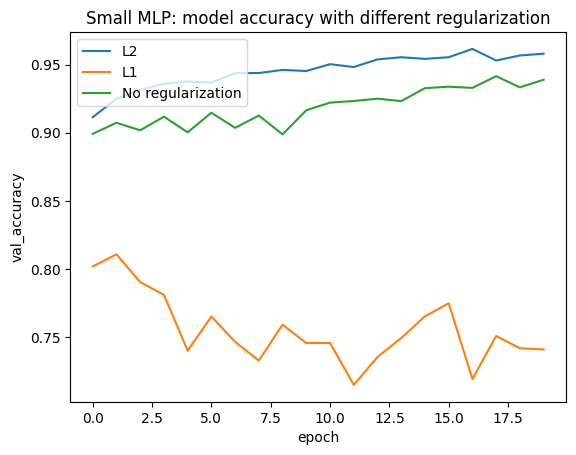

In [18]:
import matplotlib.pyplot as plt
plt.plot(history_dense_0.history['val_accuracy'])
plt.plot(history_dense_1.history['val_accuracy'])
plt.plot(history_dense_2.history['val_accuracy'])
plt.title('Small MLP: model accuracy with different regularization')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['L2', 'L1', 'No regularization'], loc='upper left')
plt.show()

In [21]:
history_dense_0.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

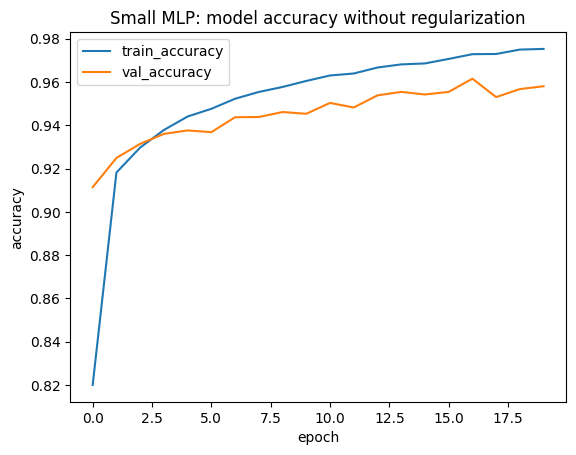

In [22]:
import matplotlib.pyplot as plt
plt.plot(history_dense_0.history['accuracy'])
plt.plot(history_dense_0.history['val_accuracy'])
plt.title('Small MLP: model accuracy without regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

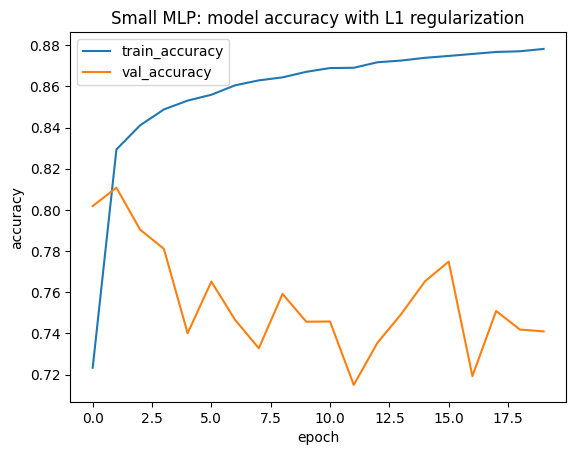

In [23]:
import matplotlib.pyplot as plt
plt.plot(history_dense_1.history['accuracy'])
plt.plot(history_dense_1.history['val_accuracy'])
plt.title('Small MLP: model accuracy with L1 regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

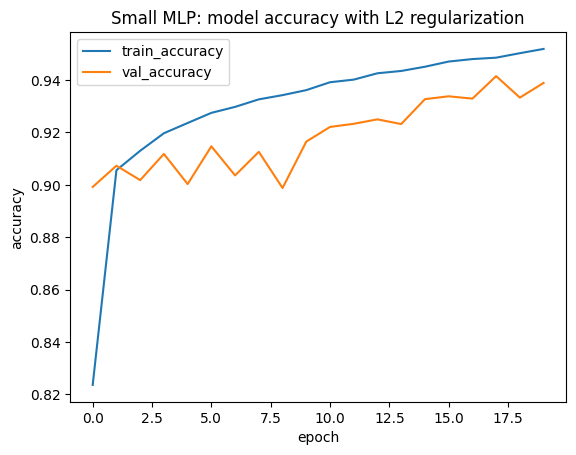

In [24]:
import matplotlib.pyplot as plt
plt.plot(history_dense_2.history['accuracy'])
plt.plot(history_dense_2.history['val_accuracy'])
plt.title('Small MLP: model accuracy with L2 regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

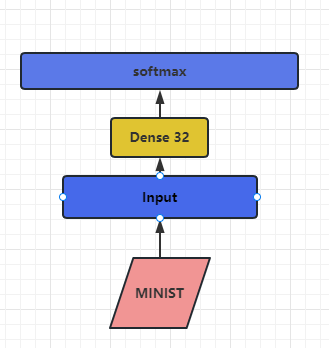